<a href="https://colab.research.google.com/github/gawankarsanket/sentiment-analysis/blob/main/Sentiment_analysis_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment analysis**

**Sentiment analysis** is a natural language processing (NLP) technique used to determine the emotional tone behind a piece of text. It's commonly used to analyze opinions, reviews, and social media content to understand the sentiment as positive, negative, or neutral. The process involves text preprocessing, feature extraction, and model selection.

Traditional models like Naive Bayes and Support Vector Machines (SVM) were initially popular for sentiment analysis. With advancements in deep learning, models like Long Short-Term Memory (LSTM) networks became prevalent due to its  ability to capture context and sequential patterns in text. More recently, transformer-based models like BERT and RoBERTa have set new benchmarks by leveraging attention mechanisms to understand nuanced sentiments.

Sentiment analysis is crucial in fields like marketing, customer service, and social media monitoring, where understanding public sentiment can guide decisions and strategies.

Here in this code we will try to perform analysis using LSTM architecture.

# **Brief about LSTM**

**Long Short-Term Memory (LSTM**) is a type of recurrent neural network (RNN) designed to handle sequential data and solve the vanishing gradient problem. Unlike traditional RNNs, LSTMs have a special structure called "gates" (input, forget, and output gates) that control the flow of information through the network. These gates allow LSTMs to remember or forget information over long sequences, making them well-suited for tasks like time series prediction, language modeling, and sentiment analysis.

LSTMs are particularly effective in capturing long-range dependencies in data, making them powerful for understanding context in sequences like sentences or videos.

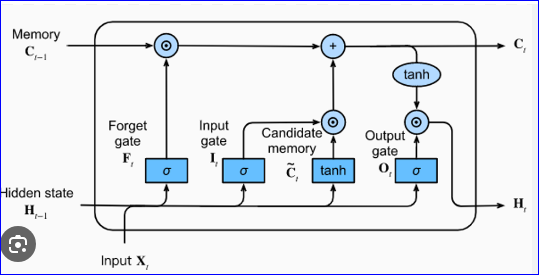

# **Problem statement**

With the exponential growth of social media, platforms like Twitter have become vital spaces for people to express their opinions on various topics, ranging from products and services to social and political issues. However, the sheer volume of tweets generated every day makes it challenging for organizations and individuals to manually monitor and analyze public sentiment.

**Objective**: The goal of this project is to develop a sentiment analysis model that can automatically classify the sentiment of Twitter comments as positive, negative, or neutral. This will enable businesses, researchers, and policymakers to gain real-time insights into public opinion and respond accordingly.

## Downloading dataset from Github repository
This involves, setting colab environment with git packege, in case of downloading large files ( 50MB is limit for file transfer over api is set on Github) use large-file-system (lfs package)
Then clone the repository in collab.

In [1]:
#Setting up git in colab environment

!apt-get install git
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!apt-get install git-lfs
!git lfs install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Detected operating system as Ubuntu/jammy.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Detected apt version as 2.4.12
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... Packagecloud gpg key imported to /etc/apt/keyrings/github_git-lfs-archive-keyring.gpg
done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be upgraded:
  git-lfs
1 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
Need to get 7,420 kB of archives.
After this operation, 6,051 kB of addi

In [2]:
#Gert entire repositry to colab instance

!git clone https://github.com/gawankarsanket/sentiment-analysis.git

Cloning into 'sentiment-analysis'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 9 (delta 1), reused 6 (delta 1), pack-reused 3 (from 1)
Receiving objects: 100% (9/9), 80.95 MiB | 52.33 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
#extract Zip file and unzip the dataset

import zipfile

# Extract the ZIP file
with zipfile.ZipFile("/content/sentiment-analysis/training.1600000.processed.noemoticon.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")


In [4]:
# Read the CSV.
# Note: encoding info is recieved from source of data
# column names recieved from source of data
import pandas as pd
df=pd.read_csv("/content/dataset/training.1600000.processed.noemoticon.csv",encoding='ISO-8859-1')
df.columns = ["label", "time", "date", "query", "username", "text"]

In [5]:
df.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## About dataset
This is the sentiment140 dataset.

It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

* **target**: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

* **ids**: The id of the tweet ( 2087)
* **date**: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* **flag**: The query (lyx). If there is no query, then this value is NO_QUERY.
* **user**: the user that tweeted (robotickilldozr)
* **text**: the text of the tweet (Lyx is cool)

## EDA

In [6]:
df.shape

(1599999, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
#Distribution output label in dataset

df['label'].value_counts()

,count
label,
4,800000
0,799999


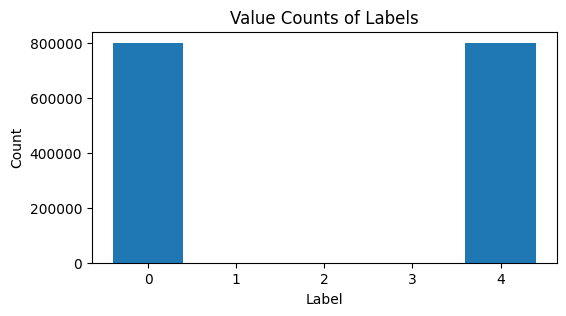

In [9]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Create a bar graph
plt.figure(figsize=(6, 3))
plt.bar(label_counts.index, label_counts.values)

# Add titles and labels
plt.title('Value Counts of Labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()



### Above graph concludes that data set is balanced with positive and negative output. There is no neutral output. We assume comments can be only negative or Positive.

In [10]:
df.isna().sum()    # no null values

,0
label,0
time,0
date,0
query,0
username,0
text,0


In [11]:
len(df['username'].unique())  # Comment from these many users are collected

659775

In [12]:
df['date'].max()

'Wed May 27 07:27:38 PDT 2009'

In [13]:
df['date'].min()

'Fri Apr 17 20:30:31 PDT 2009'

## With interest of limited computation resource and processing time, we shall take sample set from entire data . [Lets take 100000 rows of each label]

In [14]:
# here columns of our interest are text and label

df1=df[['text', 'label']].copy()
df1.head()

,text,label
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [15]:

df_label_0 = df1[df1['label'] == 0].sample(n=100000, random_state=7)
df_label_4 = df1[df1['label'] == 4].sample(n=100000, random_state=7)

# Concatenate the sampled dataframes
df_sampled = pd.concat([df_label_0, df_label_4])

# Shuffle the final dataframe
df_sampled = df_sampled.sample(frac=1, random_state=7).reset_index(drop=True)

df_sampled.shape

(200000, 2)

In [16]:
df_sampled.head()

,text,label
0,well it wasn't that hard #squarespace,4
1,@CraftyMamaof4 Thank you! Thankful that me an...,4
2,@aplusk tweets way too much. shouldn't you be ...,4
3,my biffles going to bali today i miss her!,0
4,@Lowers_ Don't!,0


 ## 0=> Negative  4=> Positive.  Making 1 insted of 4. So output will be simple 0 or 1

In [17]:
df_sampled['label'] = df_sampled['label'].replace(4, 1)

# Check the updated labels
df_sampled['label'].value_counts()

,count
label,
1,100000
0,100000


# NLP
## Lets begin with basics text processing
* 1.lowercase
* 2.regex
* 3.stopword removal
* 4.lemmetization
* 5.tokenisation

In [18]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
#FUCNTION FOR PREPROCESSING TEXT


def list_prep(messages):
  lemmatizer=WordNetLemmatizer()
  document=[]
  for i in range(len(messages)):

    text=messages[i]

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert to lowercase
    text = text.lower()

    text = text.split()  ##breaks in to words

    text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)   ## re- joins words of associated sentences
    document.append(text)

  return document

In [20]:
document=list_prep(df_sampled['text'])
#Sending data/Corpus for preprocessing

In [21]:
type(document),len(document)

(list, 200000)

In [22]:
document

['well wasnt hard',
 'thank thankful baby ok',
 'tweet way much shouldnt making movie something',
 'biffles going bali today miss',
 'dont',
 'hayley canged name leahoneill instead brassyteenager',
 'he well he dish im picking bit',
 'morning friend great day flea market shopping',
 'haha aree theree yeeet miss e haha',
 'im impressed',
 'park think ill get metro beach sun still',
 'cut hair cuter mom cut asked even back cut bang',
 'status update twitter ice timestamp mon jun cest',
 'unfortunately shoot today friend busy',
 'follow',
 'big show tonight maybe ill take week dance anywho im super excited quotmeet beatlesquot tonight',
 'love twitter kesederhanaan memang selalu memukau',
 'cant see anything',
 'finally im couch going shopping',
 'bang bang shot dead bullet head',
 'change interface colour lime see sale rocket',
 'want sims',
 'cant watch uk available',
 'oh sorry today sound great day hope thing gotten better',
 'add myspace myspacecomkiss_kathi',
 'wish could miss way i

## Split data in train test parts.

### Note we are spliting data before tokenisation. Because with tokenisation vocabulary will be formed only with train data.  and then same will be applied on test data.

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
train_texts, test_texts, train_labels, test_labels = train_test_split(document, df_sampled['label'], test_size=0.2, random_state=7)


## Tokenisation using keras

In [25]:
!pip install keras -q
!pip install tensorflow -q

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
# Initialize and fit the tokenizer on training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)


# This builds vocabulary



### Creating Sequences

In [28]:
# Convert texts to sequences
# Sequence means text to numeric format using above built vocabulary

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# this creats vector based on vocabulary

In [47]:
train_sequences[2]

[20, 167, 4934, 102, 2774, 2918, 53, 2197, 1516]

###  Padding to make each sequence of same length so that it can be fed to LSTM model as LSTM nead fied length sequence

In [29]:
# Define max length and pad sequences
# padding is neceesary as LSTM needs input at fixed lenght , since lstm processes in batch sequence. Hence all input in each batch should have same legnth


max_length = max(len(seq) for seq in train_sequences)  # Get maximum sequence length

X_train = pad_sequences(train_sequences, maxlen=max_length)
X_test = pad_sequences(test_sequences, maxlen=max_length)



In [48]:
X_train[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         20,  167, 4934,  102, 2774, 2918,   53, 2197, 1516], dtype=int32)

## Convert label into numpy array

### Converting output features (labels) to a NumPy array ensures compatibility with machine learning frameworks and can improve performance when working with large datasets. It’s a standard step in preparing data for model training and evaluation.

In [30]:
# Convert labels to numpy arrays
import numpy as np

y_train = np.array(train_labels)
y_test = np.array(test_labels)



In [31]:
# Print to check
print("Vocabulary size:", len(tokenizer.word_index) + 1)
print("Sample training sequence:", X_train[0])
print("Sample test sequence:", X_test[0])

Vocabulary size: 82015
Sample training sequence: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0    81   105  1485 18267   112]
Sample test sequence: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 46]


#LSTM Building model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [33]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of 0-based indexing
embedding_dim = 50 #This can be hyper parameter

In [34]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32,validation_data=(X_test, y_test))


Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 241s 46ms/step - accuracy: 0.7266 - loss: 0.5309 - val_accuracy: 0.7744 - val_loss: 0.4732
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 256s 46ms/step - accuracy: 0.8091 - loss: 0.4137 - val_accuracy: 0.7683 - val_loss: 0.4856
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 263s 47ms/step - accuracy: 0.8437 - loss: 0.3501 - val_accuracy: 0.7667 - val_loss: 0.5271
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 265s 47ms/step - accuracy: 0.8701 - loss: 0.2989 - val_accuracy: 0.7624 - val_loss: 0.5540
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 259s 47ms/step - accuracy: 0.8896 - loss: 0.2565 - val_accuracy: 0.7538 - val_loss: 0.5810


## Performance of model over accuracy and loss

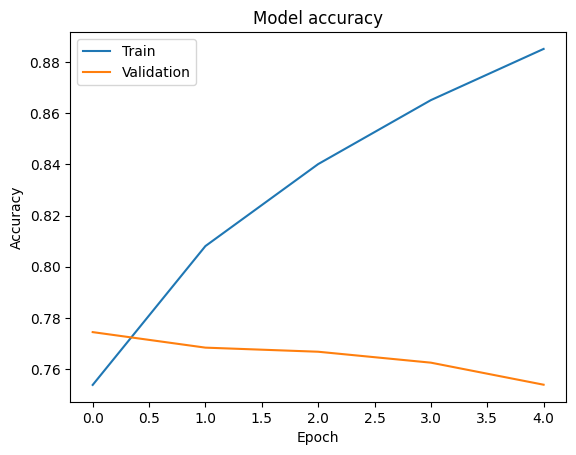

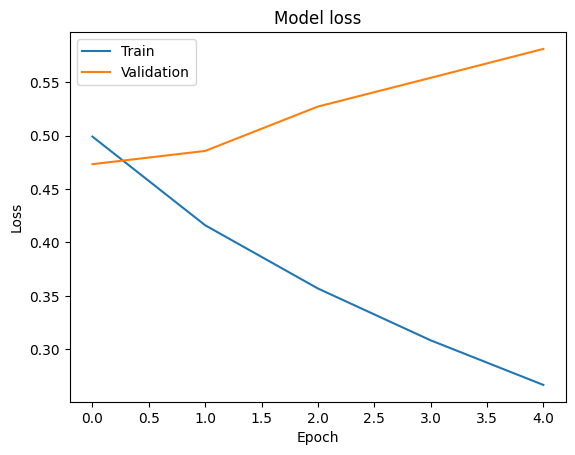

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Save model

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 31, 50)                │       4,100,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (32, 128)                   │          91,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 1)                     │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,577,583 (47.98 MB)

 Trainable params: 4,192,527 (15.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,385,056 (31.99 MB)

In [38]:
model.save('LSTMSentimentAnalyser.keras')

## Push model to Github

In [39]:
%cd '/content/sentiment-analysis'


/content/sentiment-analysis


In [40]:
# Copy the Saved Model to the Repository

!cp '/content/LSTMSentimentAnalyser.keras' ./


## Config Git

In [51]:
!git config --global user.email "gawankar.sanket@gmail.com"
!git config --global user.name "gawankarsanket"

In [42]:
!git remote add origin https://github.com/gawankarsanket/sentiment-analysis.git

error: remote origin already exists.


In [49]:
!git add LSTMSentimentAnalyser.keras
!git commit -m "Add saved model from Colab"


On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [52]:
!git push -u origin main

fatal: could not read Username for 'https://github.com': No such device or address
